<h1>Generar datasets</h1>

In [46]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

def generar_dataset(tamano, tipo, nombre_archivo):
    if tipo == 'aleatorio':
        datos = [random.randint(1, 10000) for _ in range(tamano)]
    elif tipo == 'semi_ordenado':
        datos = sorted([random.randint(1, 10000) for _ in range(tamano)])[:int(0.7*tamano)]
        datos += [random.randint(1, 10000) for _ in range(tamano - len(datos))]
    elif tipo == 'invertido':
        datos = sorted([random.randint(1, 10000) for _ in range(tamano)], reverse=True)
    elif tipo == 'parcialmente_ordenado':
        datos = sorted([random.randint(1, 10000) for _ in range(tamano//2)])
        datos += [random.randint(1, 10000) for _ in range(tamano//2)]
    elif tipo == 'ordenado':
      datos = sorted([random.randint(1, 10000) for _ in range(tamano)])
    with open(nombre_archivo, 'w') as file:
        file.write(" ".join(map(str, datos)))

def measure_time(sort_function, data, nombre = ''):

    start_time = time.time()
    sort_function(data)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return elapsed_time

df = pd.DataFrame(columns=['algoritmo','orden', 'tipo', 'tiempo'])

# Generar un dataset de 1000 elementos aleatorios
orden = 5 #-1
for i in range(1,orden):
  generar_dataset(10**i, 'ordenado', 'dataset'+str(i)+'O.txt')
  generar_dataset(10**i, 'aleatorio', 'dataset'+str(i)+'A.txt')
  generar_dataset(10**i, 'semi_ordenado', 'dataset'+str(i)+'S.txt')
  generar_dataset(10**i, 'invertido', 'dataset'+str(i)+'I.txt')
  generar_dataset(10**i, 'parcialmente_ordenado', 'dataset'+str(i)+'P.txt')



<h1>Algoritmos de ordenamiento</h1>

<h2>Bubble Sort</h2>

In [47]:
#https://www.geeksforgeeks.org/python-program-for-bubble-sort/



def bubbleSort(arr):
    n = len(arr)

    # Traverse through all array elements
    for i in range(n):
        swapped = False

        # Last i elements are already in place
        for j in range(0, n-i-1):

            # Traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if (swapped == False):
            break

types = ["A","P","I","S","O"]

txt = open("bubblesortresults.txt", "w")
for j in range(5):

  for i in range(1,orden):
    lista = []
    archivo = open("dataset"+str(i)+types[j]+".txt", "r")
    a = archivo.read().split()
    for number in a:
      lista.append(int(number))

    elapsed_time = measure_time(bubbleSort,lista)
    txt.write("orden: {}\t\ttipo: {}tiempo: {}\n".format(i,types[j],str(elapsed_time)))


    new_row = pd.DataFrame({'algoritmo': ['bubble_sort'], 'orden': [str(i)], 'tipo': [types[j]], 'tiempo': [elapsed_time]})
    df = pd.concat([df, new_row], ignore_index=True)



    archivo.close()
txt.close()


<ipython-input-47-916e200b0eed>:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


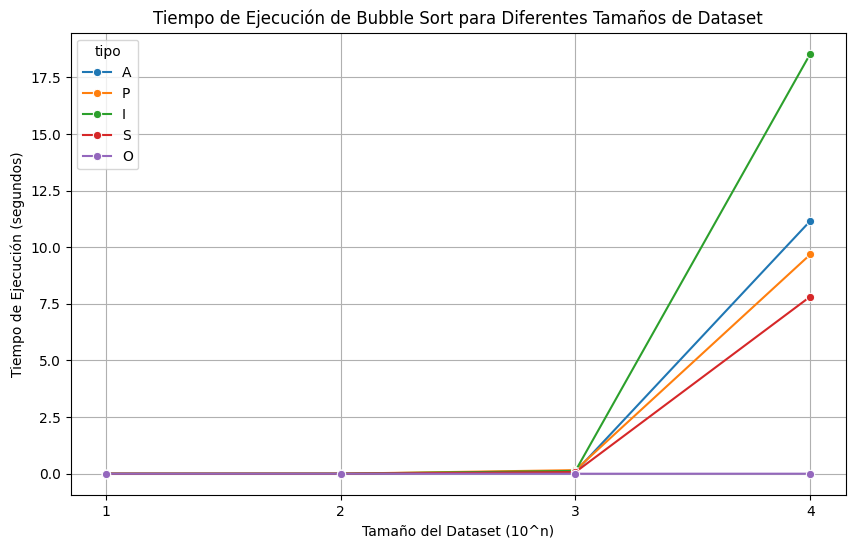

In [48]:
# prompt: grafico de bubble sort

import seaborn as sns
# Filtrar los datos para el algoritmo Bubble Sort
df_bubble = df[df['algoritmo'] == 'bubble_sort']

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x='orden', y='tiempo', hue='tipo', data=df_bubble, marker='o')
plt.title('Tiempo de Ejecución de Bubble Sort para Diferentes Tamaños de Dataset')
plt.xlabel('Tamaño del Dataset (10^n)')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.grid(True)
plt.show()


<h2>Insertion Sort</h2>

In [49]:

#https://www.geeksforgeeks.org/python-program-for-insertion-sort/



def insertionSort(arr):
	n = len(arr) # Get the length of the array

	if n <= 1:
		return # If the array has 0 or 1 element, it is already sorted, so return

	for i in range(1, n): # Iterate over the array starting from the second element
		key = arr[i] # Store the current element as the key to be inserted in the right position
		j = i-1
		while j >= 0 and key < arr[j]: # Move elements greater than key one position ahead
			arr[j+1] = arr[j] # Shift elements to the right
			j -= 1
		arr[j+1] = key # Insert the key in the correct position

types = ["A","P","I","S","O"]

for j in range(5):

  for i in range(1,orden):
    lista = []
    archivo = open("dataset"+str(i)+types[j]+".txt", "r")
    a = archivo.read().split()
    for number in a:
      lista.append(int(number))

    elapsed_time = measure_time(insertionSort,lista)

    new_row = pd.DataFrame({'algoritmo': ['insertionSort'], 'orden': [str(i)], 'tipo': [types[j]], 'tiempo': [elapsed_time]})
    df = pd.concat([df, new_row], ignore_index=True)



    archivo.close()
  #df.plot(x='orden', y='tiempo', kind='bar', title='Insertion Sort {}'.format(types[j]))



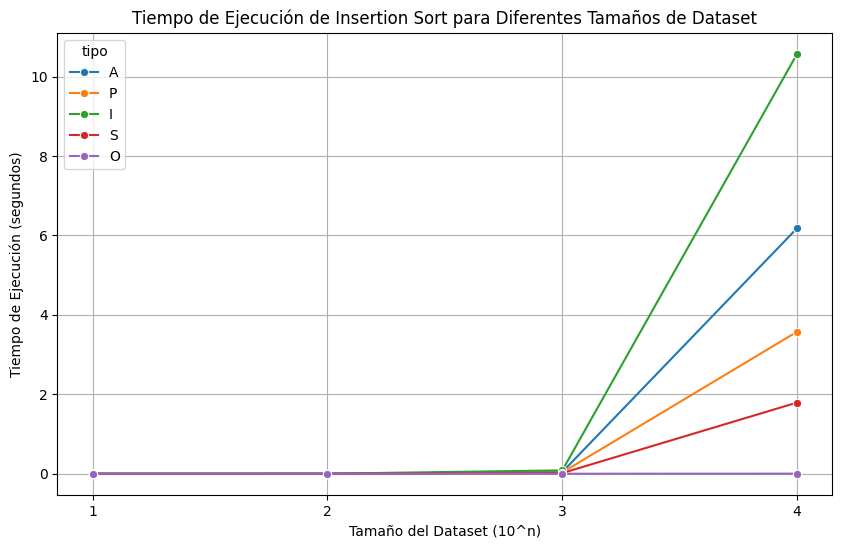

In [50]:
# prompt: grafico de bubble sort

import seaborn as sns
# Filtrar los datos para el algoritmo Bubble Sort
df_bubble = df[df['algoritmo'] == 'insertionSort']

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x='orden', y='tiempo', hue='tipo', data=df_bubble, marker='o')
plt.title('Tiempo de Ejecución de Insertion Sort para Diferentes Tamaños de Dataset')
plt.xlabel('Tamaño del Dataset (10^n)')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.grid(True)
plt.show()


<h2>Merge Sort</h2>

In [51]:


#https://www.w3schools.com/dsa/dsa_algo_mergesort.php

def merge(left, right):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])

    return result

def mergeSort(arr):
    step = 1  # Starting with sub-arrays of length 1
    length = len(arr)

    while step < length:
        for i in range(0, length, 2 * step):
            left = arr[i:i + step]
            right = arr[i + step:i + 2 * step]

            merged = merge(left, right)

            # Place the merged array back into the original array
            for j, val in enumerate(merged):
                arr[i + j] = val

        step *= 2  # Double the sub-array length for the next iteration

    return arr


types = ["A","P","I","S","O"]

for j in range(5):

  for i in range(1,orden):
    lista = []
    archivo = open("dataset"+str(i)+types[j]+".txt", "r")
    a = archivo.read().split()
    for number in a:
      lista.append(int(number))

    elapsed_time = measure_time(mergeSort,lista)

    new_row = pd.DataFrame({'algoritmo': ['mergeSort'], 'orden': [str(i)], 'tipo': [types[j]], 'tiempo': [elapsed_time]})
    df = pd.concat([df, new_row], ignore_index=True)



    archivo.close()


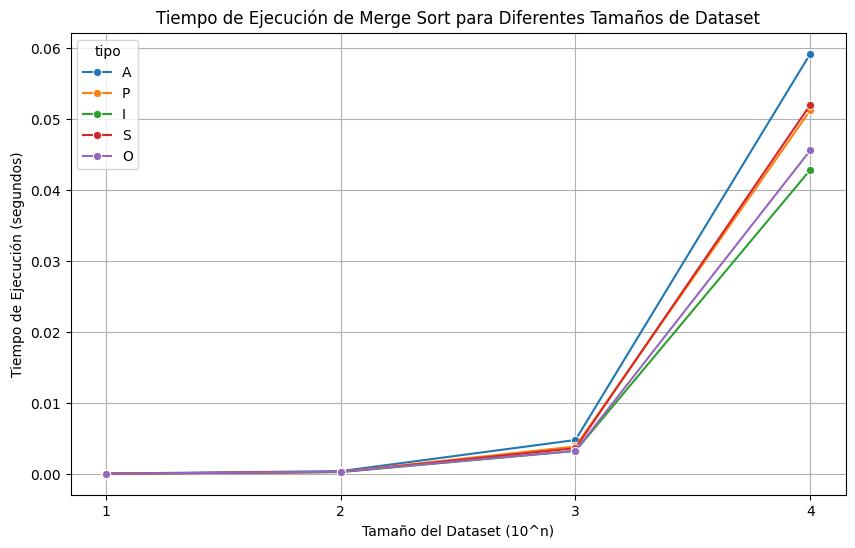

In [52]:
# prompt: grafico de bubble sort

import seaborn as sns
# Filtrar los datos para el algoritmo Bubble Sort
df_bubble = df[df['algoritmo'] == 'mergeSort']

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x='orden', y='tiempo', hue='tipo', data=df_bubble, marker='o')
plt.title('Tiempo de Ejecución de Merge Sort para Diferentes Tamaños de Dataset')
plt.xlabel('Tamaño del Dataset (10^n)')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.grid(True)
plt.show()


<h2>Python Sort</h2>

In [53]:
types = ["A","P","I","S","O"]

for j in range(5):

  for i in range(1,orden):
    lista = []
    archivo = open("dataset"+str(i)+types[j]+".txt", "r")
    a = archivo.read().split()
    for number in a:
      lista.append(int(number))

    start_time = time.time()
    lista.sort()
    end_time = time.time()
    elapsed_time = end_time - start_time

    new_row = pd.DataFrame({'algoritmo': ['PythonSort'], 'orden': [str(i)], 'tipo': [types[j]], 'tiempo': [elapsed_time]})
    df = pd.concat([df, new_row], ignore_index=True)



    archivo.close()

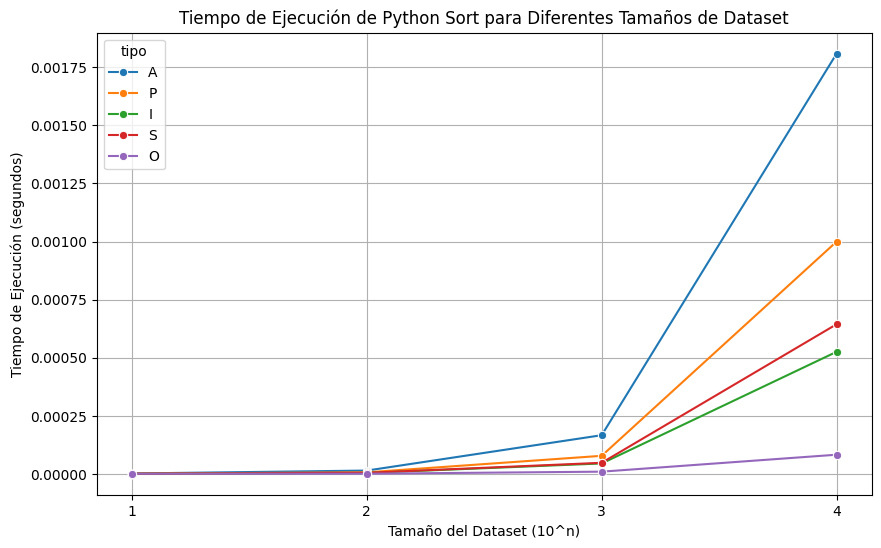

In [54]:
# prompt: grafico de bubble sort

import seaborn as sns
# Filtrar los datos para el algoritmo Bubble Sort
df_bubble = df[df['algoritmo'] == 'PythonSort']

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x='orden', y='tiempo', hue='tipo', data=df_bubble, marker='o')
plt.title('Tiempo de Ejecución de Python Sort para Diferentes Tamaños de Dataset')
plt.xlabel('Tamaño del Dataset (10^n)')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.grid(True)
plt.show()


<h2>Quick Sort</h2>

In [55]:
#https://www.w3schools.com/dsa/dsa_algo_quicksort.php


def partition(array, low, high):
    pivot = array[high]
    i = low - 1

    for j in range(low, high):
        if array[j] <= pivot:
            i += 1
            array[i], array[j] = array[j], array[i]

    array[i+1], array[high] = array[high], array[i+1]
    return i+1

def quicksort(array, low=0, high=None):
    if high is None:
        high = len(array) - 1

    if low < high:
        pivot_index = partition(array, low, high)
        try:
            quicksort(array, low, pivot_index-1)
        except RecursionError:
            pass

        try:
            quicksort(array, pivot_index+1, high)
        except RecursionError:
            pass





types = ["A","P","I","S","O"]

for j in range(5):

  for i in range(1,orden):
    lista = []
    archivo = open("dataset"+str(i)+types[j]+".txt", "r")
    a = archivo.read().split()
    for number in a:
      lista.append(int(number))

    elapsed_time = measure_time(quicksort,lista)

    new_row = pd.DataFrame({'algoritmo': ['QuickSort'], 'orden': [str(i)], 'tipo': [types[j]], 'tiempo': [elapsed_time]})
    df = pd.concat([df, new_row], ignore_index=True)



    archivo.close()


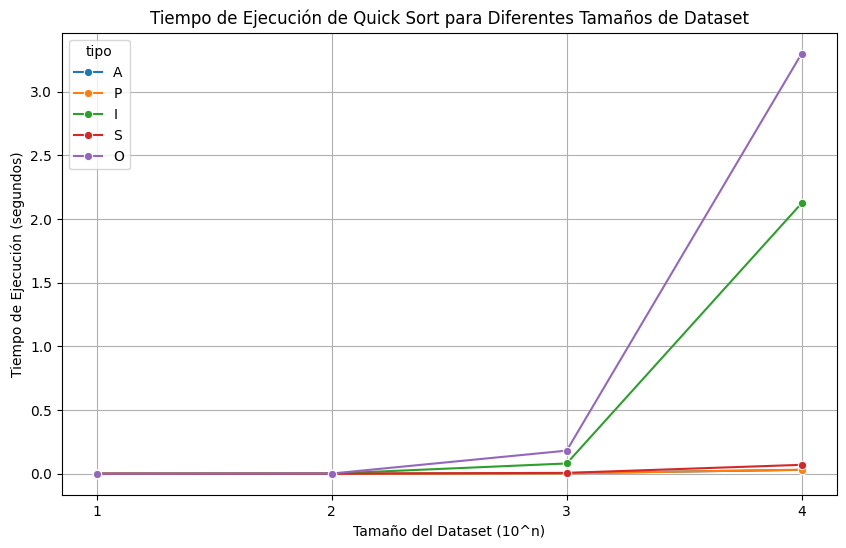

In [56]:
# prompt: grafico de bubble sort

import seaborn as sns
# Filtrar los datos para el algoritmo Bubble Sort
df_bubble = df[df['algoritmo'] == 'QuickSort']

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x='orden', y='tiempo', hue='tipo', data=df_bubble, marker='o')
plt.title('Tiempo de Ejecución de Quick Sort para Diferentes Tamaños de Dataset')
plt.xlabel('Tamaño del Dataset (10^n)')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.grid(True)
plt.show()


<h2>Selection Sort</h2>

In [57]:
#https://www.geeksforgeeks.org/python-program-for-selection-sort/


# Selection sort in Python
# time complexity O(n*n)
#sorting by finding min_index
def selectionSort(array):
	size = len(array)
	for ind in range(size):
		min_index = ind

		for j in range(ind + 1, size):
			# select the minimum element in every iteration
			if array[j] < array[min_index]:
				min_index = j
		# swapping the elements to sort the array
		(array[ind], array[min_index]) = (array[min_index], array[ind])

types = ["A","P","I","S","O"]

for j in range(5):

  for i in range(1,orden):
    lista = []
    archivo = open("dataset"+str(i)+types[j]+".txt", "r")
    a = archivo.read().split()
    for number in a:
      lista.append(int(number))

    elapsed_time = measure_time(selectionSort,lista)

    new_row = pd.DataFrame({'algoritmo': ['SelectionSort'], 'orden': [str(i)], 'tipo': [types[j]], 'tiempo': [elapsed_time]})
    df = pd.concat([df, new_row], ignore_index=True)



    archivo.close()



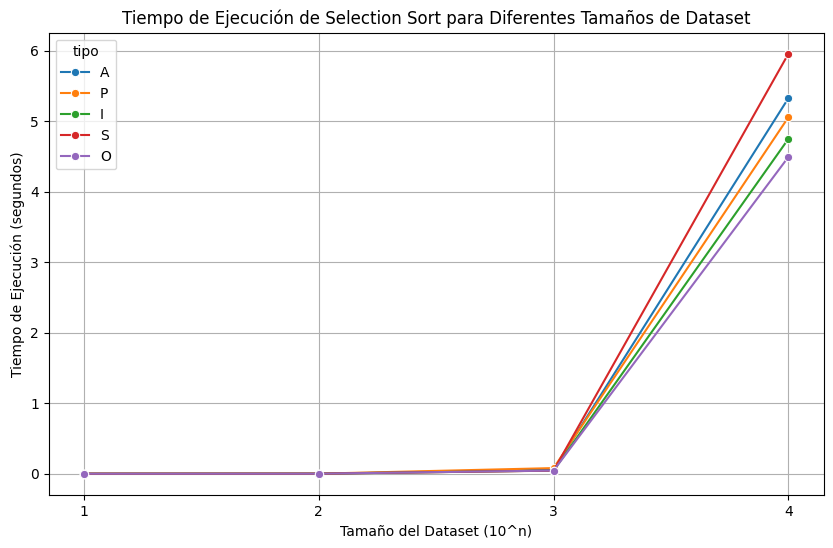

In [58]:
# prompt: grafico de bubble sort

import seaborn as sns
# Filtrar los datos para el algoritmo Bubble Sort
df_bubble = df[df['algoritmo'] == 'SelectionSort']

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x='orden', y='tiempo', hue='tipo', data=df_bubble, marker='o')
plt.title('Tiempo de Ejecución de Selection Sort para Diferentes Tamaños de Dataset')
plt.xlabel('Tamaño del Dataset (10^n)')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.grid(True)
plt.show()


In [ ]:
df

,algoritmo,orden,tipo,tiempo
0,bubble_sort,1,A,0.000011
1,bubble_sort,2,A,0.001837
2,bubble_sort,3,A,0.184994
3,bubble_sort,4,A,11.842735
4,bubble_sort,1,P,0.000012
...,...,...,...,...
91,SelectionSort,4,I,5.686124
92,SelectionSort,1,S,0.000010
93,SelectionSort,2,S,0.000396
94,SelectionSort,3,S,0.042560


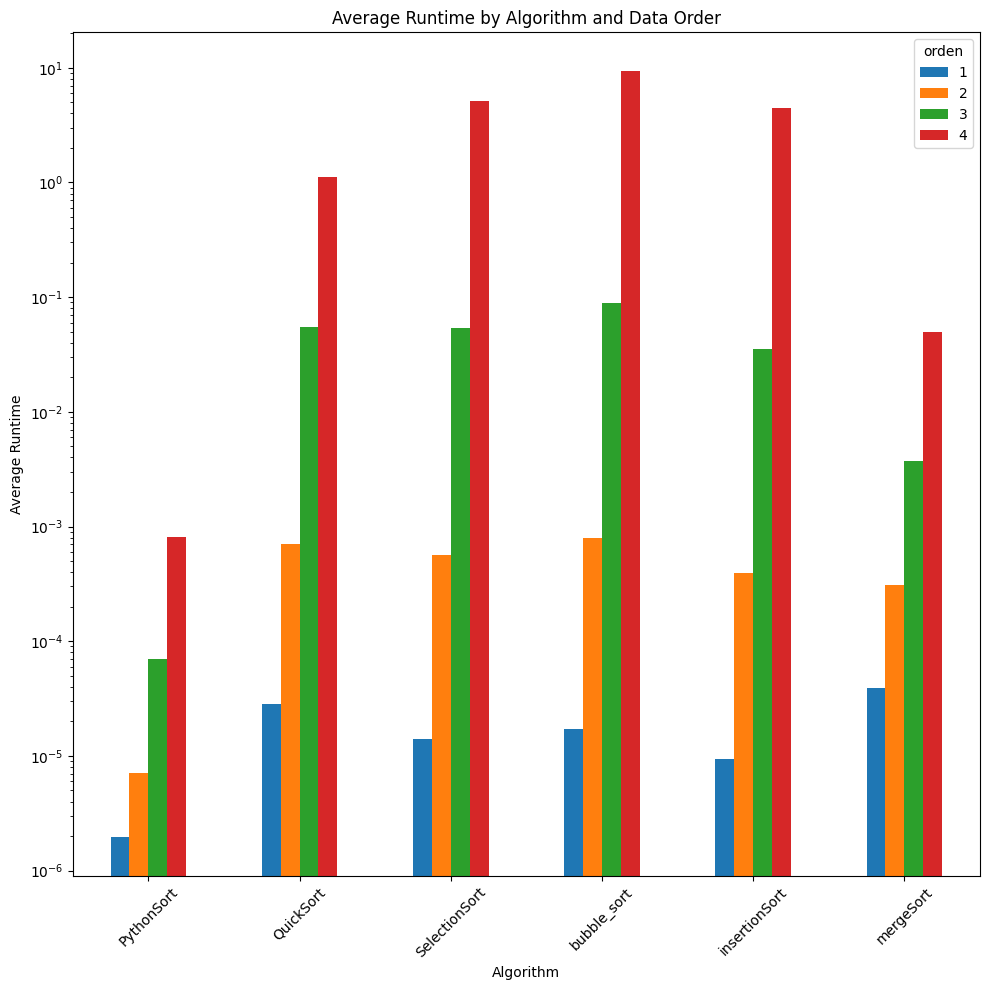

In [59]:
# @title Average Runtime by Algorithm and Data Order

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
df_grouped = df.groupby(['algoritmo', 'orden'])['tiempo'].mean().unstack()

df_grouped.plot(kind='bar', figsize=(10, 10))
#acercar
plt.yscale('log')

plt.xlabel('Algorithm')
plt.ylabel('Average Runtime')
plt.title('Average Runtime by Algorithm and Data Order')
plt.xticks(rotation=45)
_ = plt.tight_layout()